In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df_train = pd.read_csv("/home/shsingh/knowledge_distillation/dataset/scratch/dataframes/train_df.csv")
df_val = pd.read_csv("/home/shsingh/knowledge_distillation/dataset/scratch/dataframes/val_df.csv")
df_test = pd.read_csv("/home/shsingh/knowledge_distillation/dataset/scratch/dataframes/test_df.csv")

In [9]:
df_val

,Unnamed: 0,subject_id,image_idx,image_path,label_flair,label_t1,label_t1ce,label_t2,Brats20ID,Age,Survival_days,Extent_of_Resection
0,0,BraTS20_Training_290,BraTS20_Training_290_seg_133,/home/shsingh/knowledge_distillation/dataset/s...,healthy,healthy,healthy,healthy,NaN,NaN,NaN,NaN
1,1,BraTS20_Training_056,BraTS20_Training_056_seg_78,/home/shsingh/knowledge_distillation/dataset/s...,HGG,HGG,HGG,HGG,BraTS20_Training_056,71.126,208,GTR
2,2,BraTS20_Training_216,BraTS20_Training_216_seg_137,/home/shsingh/knowledge_distillation/dataset/s...,healthy,healthy,healthy,healthy,BraTS20_Training_216,59.584,103,NaN
3,3,BraTS20_Training_352,BraTS20_Training_352_seg_20,/home/shsingh/knowledge_distillation/dataset/s...,healthy,healthy,healthy,healthy,NaN,NaN,NaN,NaN
4,4,BraTS20_Training_337,BraTS20_Training_337_seg_48,/home/shsingh/knowledge_distillation/dataset/s...,healthy,healthy,healthy,healthy,BraTS20_Training_337,57.000,1076,GTR
...,...,...,...,...,...,...,...,...,...,...,...,...
8954,8954,BraTS20_Training_091,BraTS20_Training_091_seg_119,/home/shsingh/knowledge_distillation/dataset/s...,HGG,HGG,HGG,HGG,BraTS20_Training_091,70.860,146,GTR
8955,8955,BraTS20_Training_166,BraTS20_Training_166_seg_133,/home/shsingh/knowledge_distillation/dataset/s...,healthy,healthy,healthy,healthy,BraTS20_Training_166,78.792,448,NaN
8956,8956,BraTS20_Training_086,BraTS20_Training_086_seg_10,/home/shsingh/knowledge_distillation/dataset/s...,healthy,healthy,healthy,healthy,BraTS20_Training_086,55.595,510,GTR
8957,8957,BraTS20_Training_013,BraTS20_Training_013_seg_10,/home/shsingh/knowledge_distillation/dataset/s...,healthy,healthy,healthy,healthy,BraTS20_Training_013,59.693,698,GTR


In [10]:
df_train['subject_id'].value_counts()

BraTS20_Training_043    111
BraTS20_Training_322    111
BraTS20_Training_321    110
BraTS20_Training_094    110
BraTS20_Training_058    110
                       ... 
BraTS20_Training_165     80
BraTS20_Training_357     78
BraTS20_Training_206     76
BraTS20_Training_366     71
BraTS20_Training_360     66
Name: subject_id, Length: 369, dtype: int64

In [11]:
df_train.columns

Index(['Unnamed: 0', 'subject_id', 'image_idx', 'image_path', 'label_flair',
       'label_t1', 'label_t1ce', 'label_t2', 'Brats20ID', 'Age',
       'Survival_days', 'Extent_of_Resection'],
      dtype='object')

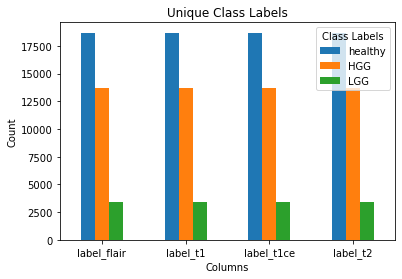

In [9]:
# Select the columns of interest
columns = ['label_flair', 'label_t1', 'label_t1ce', 'label_t2']

# Create a new DataFrame with the value counts of each unique value in the selected columns
value_counts = df_train[columns].apply(lambda x: x.value_counts()).T

# Plot the bar chart
value_counts.plot(kind='bar')
plt.title('Unique Class Labels')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class Labels')
plt.show()

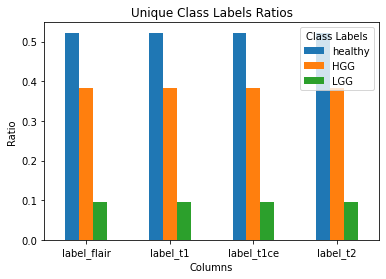

In [17]:
# Select the columns of interest
columns = ['label_flair', 'label_t1', 'label_t1ce', 'label_t2']

# Create a new DataFrame with the value counts and ratios of each unique value in the selected columns
value_counts = df_train[columns].apply(lambda x: x.value_counts(normalize=True)).T

# Plot the bar chart
value_counts.plot(kind='bar')
plt.title('Unique Class Labels Ratios')
plt.xlabel('Columns')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.legend(title='Class Labels')
plt.show()

In [50]:
def get_class_distribution_plots(df, ratio):
    
    # Define the number of categorical values
    num_categories = 3
    # Select the columns of interest
    columns = ['label_flair', 'label_t1', 'label_t1ce', 'label_t2']
    if ratio:
        # Create a colormap with the desired color
        # colormap = plt.cm.get_cmap('Oranges_r')
        colormap = plt.cm.get_cmap('BuPu_r')
        # Generate colors from the colormap ranging from dark to light
        colors = [colormap(i / num_categories) for i in range(num_categories)]
        # Create a new DataFrame with the value counts and ratios of each unique value in the selected columns
        value_counts = df[columns].apply(lambda x: x.value_counts(normalize=True)).T
        # Plot the bar chart
        fig, ax = plt.subplots()
        value_counts.plot(kind='bar', ax=ax, color=colors)
        plt.title('Class distribution per modularities (in ratio)')
        plt.xlabel('modularities')
        plt.ylabel('Ratio')
        plt.xticks(rotation=0)
        plt.legend(title='Class Labels')

        # Adjust the color of the legend handles to match the colors of the bars
        legend_handles = ax.get_legend().legendHandles
        for i in range(len(legend_handles)):
            legend_handles[i].set_color(colors[i])

        plt.show()
        
    else:
        # Create a colormap with the desired color
        # colormap = plt.cm.get_cmap('Oranges_r')
        colormap = plt.cm.get_cmap('Greens_r')
        # Generate colors from the colormap ranging from dark to light
        colors = [colormap(i / num_categories) for i in range(num_categories)]
        # Create a new DataFrame with the value counts and ratios of each unique value in the selected columns
        value_counts = df[columns].apply(lambda x: x.value_counts()).T
        # Plot the bar chart
        fig, ax = plt.subplots()
        value_counts.plot(kind='bar', ax=ax, color=colors)
        plt.title('Class distribution per modularities(in number)')
        plt.xlabel('modularities')
        plt.ylabel('#samples')
        plt.xticks(rotation=0)
        plt.legend(title='Class Labels')

        # Adjust the color of the legend handles to match the colors of the bars
        legend_handles = ax.get_legend().legendHandles
        for i in range(len(legend_handles)):
            legend_handles[i].set_color(colors[i])

        plt.show()
    return


/tmp/ipykernel_2480637/2379436897.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Greens_r')
/tmp/ipykernel_2480637/2379436897.py:49: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend_handles = ax.get_legend().legendHandles


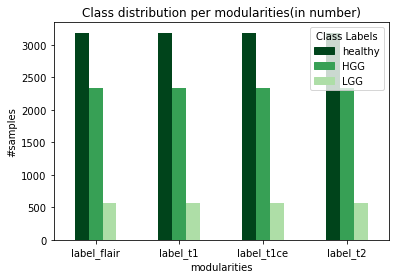

In [54]:
get_class_distribution_plots(df_test, False)

/tmp/ipykernel_2480637/1542516730.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('BuPu_r')
/tmp/ipykernel_2480637/1542516730.py:34: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend_handles = ax.get_legend().legendHandles


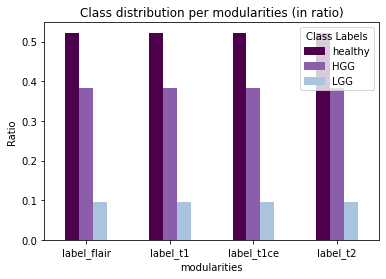

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the number of categorical values
num_categories = 3

# Create a colormap with the desired color
# colormap = plt.cm.get_cmap('Oranges_r')
colormap = plt.cm.get_cmap('BuPu_r')

# Generate colors from the colormap ranging from dark to light
colors = [colormap(i / num_categories) for i in range(num_categories)]

# Create the bar plot
categories = ['Healthy', 'HGG', 'LGG']

# Select the columns of interest
columns = ['label_flair', 'label_t1', 'label_t1ce', 'label_t2']

# Create a new DataFrame with the value counts and ratios of each unique value in the selected columns
value_counts = df_train[columns].apply(lambda x: x.value_counts(normalize=True)).T

# Plot the bar chart
fig, ax = plt.subplots()
value_counts.plot(kind='bar', ax=ax, color=colors)
plt.title('Class distribution per modularities (in ratio)')
plt.xlabel('modularities')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.legend(title='Class Labels')

# Adjust the color of the legend handles to match the colors of the bars
legend_handles = ax.get_legend().legendHandles
for i in range(len(legend_handles)):
    legend_handles[i].set_color(colors[i])

plt.show()


/tmp/ipykernel_2480637/216845989.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Greens_r')
/tmp/ipykernel_2480637/216845989.py:27: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend_handles = ax.get_legend().legendHandles


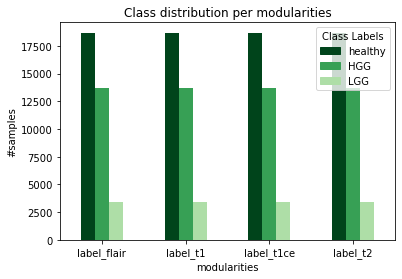

In [41]:


# Define the number of categorical values
num_categories = 3

# Create a colormap with the desired color
# colormap = plt.cm.get_cmap('Oranges_r')
colormap = plt.cm.get_cmap('Greens_r')

# Generate colors from the colormap ranging from dark to light
colors = [colormap(i / num_categories) for i in range(num_categories)]

# Select the columns of interest
columns = ['label_flair', 'label_t1', 'label_t1ce', 'label_t2']

# Create a new DataFrame with the value counts and ratios of each unique value in the selected columns
value_counts = df_train[columns].apply(lambda x: x.value_counts()).T

# Plot the bar chart
fig, ax = plt.subplots()
value_counts.plot(kind='bar', ax=ax, color=colors)
plt.title('Class distribution per modularities(in number)')
plt.xlabel('modularities')
plt.ylabel('#samples')
plt.xticks(rotation=0)
plt.legend(title='Class Labels')

# Adjust the color of the legend handles to match the colors of the bars
legend_handles = ax.get_legend().legendHandles
for i in range(len(legend_handles)):
    legend_handles[i].set_color(colors[i])

plt.show()


In [86]:
train_acc_df = pd.read_csv('/home/shsingh/knowledge_distillation/results/flair/baseline/resnet18/list_train_acc.csv')
# df = pd.DataFrame(train_acc_df.T,columns=['accuracy'])
df = train_acc_df.T
# Reset the index to convert the index column to a regular column
df = df.reset_index()

# Rename the column
df = df.rename(columns={'index': 'accuracy'})
# Rename the index column
df = df.rename_axis('epoch')
# Add a column name to the DataFrame
# df.columns = ['epoch', 'accuracy']

df.columns
# # Add a column name to the DataFrame
# # df.columns = ['accuracy']
# # Extract the accuracy values and epochs from the DataFrame
# epochs = df.index
# accuracy = df['accuracy']

# # Plot the accuracy values
# plt.plot(epochs, accuracy, marker='o')

# # Set labels and title
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training Accuracy vs. Epoch')

# # Display the plot
# plt.show()

Index(['accuracy'], dtype='object')

In [187]:
def get_accuracy_plotting_df(df_acc):    
    df = pd.DataFrame(df_acc.T)
    df.reset_index(level=0, inplace=True)
    # Rename the column
    df = df.rename(columns={'index': 'accuracy'})
    # Convert the 'accuracy' column to numeric type
    df['accuracy'] = pd.to_numeric(df['accuracy'], errors='coerce')
    # Round the 'accuracy' column to 4 decimal places
    df['accuracy'] = df['accuracy'].round(4)
    df = df.rename_axis('epoch')
    return df

def plot_accuracy_dfs(dfs):
    # Create a list of legend labels for each dataframe
    legend_labels = ['baseline_resnet18', 'baseline_resnet50', 'kd_ts','kd_st','kd_ss','kd_tt']
    # Create a colormap for line colors
    colormap = plt.cm.get_cmap('tab10')
#     colormap = plt.cm.get_cmap('gist_heat')
    # Plot the data
    plt.figure(figsize=(10, 6))
    for i, df in enumerate(dfs):
        plt.plot(df.index, df['accuracy'], color=colormap(i), label=legend_labels[i])
    # Set plot title and labels
    plt.title('Accuracy vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

In [149]:


# def get_multiple_accuracy_plot_df(mod, split):
#     path ='/home/shsingh/knowledge_distillation/results/flair/baseline/'
#     if split == 'train':
#         train = 'list_train_acc'
#     elif split == 'val':
#         val = 'list_val_acc'
    
#     train_acc_baseline18_df = pd.read_csv(f'/home/shsingh/knowledge_distillation/results/flair/baseline/resnet18/list_train_acc.csv')
#     df_baseline18 = get_accuracy_plotting_df(train_acc_baseline18_df)

#     train_acc_baseline50_df = pd.read_csv(f'/home/shsingh/knowledge_distillation/results/flair/baseline/resnet50/list_train_acc.csv')
#     df_baseline50 = get_accuracy_plotting_df(train_acc_baseline50_df)

#     train_acc_kd_ts_df = pd.read_csv(f'/home/shsingh/knowledge_distillation/results/flair/kd/resnet50_resnet18/list_train_acc.csv')
#     df_kd_ts = get_accuracy_plotting_df(train_acc_kd_ts_df)

#     train_acc_kd_st_df = pd.read_csv(f'/home/shsingh/knowledge_distillation/results/flair/kd/resnet50_resnet18/list_train_acc.csv')
#     df_kd_st = get_accuracy_plotting_df(train_acc_kd_st_df)

#     train_acc_kd_ss_df = pd.read_csv(f'/home/shsingh/knowledge_distillation/results/flair/kd/resnet50_resnet18/list_train_acc.csv')
#     df_kd_ss = get_accuracy_plotting_df(train_acc_kd_ss_df)

#     train_acc_kd_tt_df = pd.read_csv(f'/home/shsingh/knowledge_distillation/results/flair/kd/resnet50_resnet18/list_train_acc.csv')
#     df_kd_tt = get_accuracy_plotting_df(train_acc_kd_tt_df)

#     df_plot = [df_baseline18,df_baseline50, df_kd_ts, df_kd_ss, df_kd_tt]

#     return

In [185]:


def get_multiple_accuracy_plot_df(mod, split, metric):
    
    path ='/home/shsingh/knowledge_distillation/results'
    if split == 'train':
        list_name = f'list_train_{metric}'
    elif split == 'val':
        list_name = f'list_val_{metric}'
    
    train_acc_baseline18_df = pd.read_csv(f'{path}/{mod}/baseline/resnet18/{list_name}.csv')
    df_baseline18 = get_accuracy_plotting_df(train_acc_baseline18_df)

    train_acc_baseline50_df = pd.read_csv(f'{path}/{mod}/baseline/resnet50/{list_name}.csv')
    df_baseline50 = get_accuracy_plotting_df(train_acc_baseline50_df)

    train_acc_kd_ts_df = pd.read_csv(f'{path}/{mod}/kd/resnet50_resnet18/{list_name}.csv')
    df_kd_ts = get_accuracy_plotting_df(train_acc_kd_ts_df)

    train_acc_kd_st_df = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet50/{list_name}.csv')
    df_kd_st = get_accuracy_plotting_df(train_acc_kd_st_df)

    train_acc_kd_ss_df = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet18/{list_name}.csv')
    df_kd_ss = get_accuracy_plotting_df(train_acc_kd_ss_df)

    train_acc_kd_tt_df = pd.read_csv(f'{path}/{mod}/kd_size/resnet50_resnet50/{list_name}.csv')
    df_kd_tt = get_accuracy_plotting_df(train_acc_kd_tt_df)

    df_plot = [df_baseline18,df_baseline50, df_kd_ts,df_kd_st, df_kd_ss, df_kd_tt]

    return df_plot

In [170]:
df_plot= get_multiple_accuracy_plot_df('flair', 'train')
df_plot

[       accuracy
 epoch          
 0        0.7048
 1        0.7296
 2        0.7568
 3        0.7700
 4        0.7797
 5        0.8007
 6        0.8128
 7        0.8221
 8        0.8380
 9        0.8472
 10       0.8530
 11       0.8631
 12       0.8698
 13       0.8750
 14       0.8789
 15       0.8826
 16       0.8842
 17       0.8888
 18       0.8905
 19       0.8914
 20       0.8957
 21       0.8952
 22       0.8948
 23       0.8979
 24       0.8964
 25       0.8973
 26       0.8994
 27       0.8986
 28       0.8986
 29       0.8993
 30          NaN
 31       0.9003
 32       0.9027
 33       0.9009
 34       0.9015
 35       0.9006
 36       0.8987
 37       0.9005
 38       0.8989
 39       0.9001,
        accuracy
 epoch          
 0        0.7046
 1        0.7344
 2        0.7526
 3        0.7624
 4        0.7735
 5        0.7899
 6        0.8006
 7        0.8101
 8        0.8252
 9        0.8349
 10       0.8389
 11       0.8476
 12       0.8561
 13       0.8593
 14       0.8

/tmp/ipykernel_2480637/1071157253.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


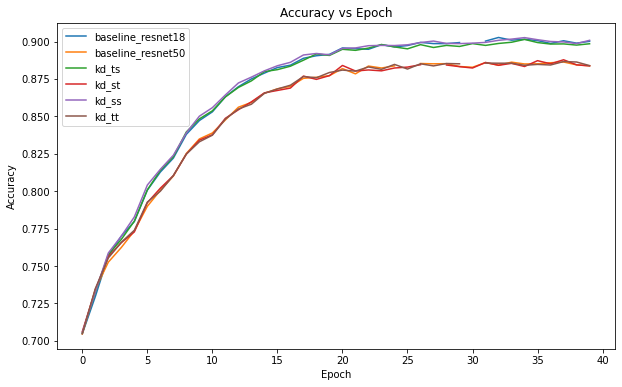

In [171]:
plot_accuracy_dfs(df_plot)

/tmp/ipykernel_2480637/1071157253.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


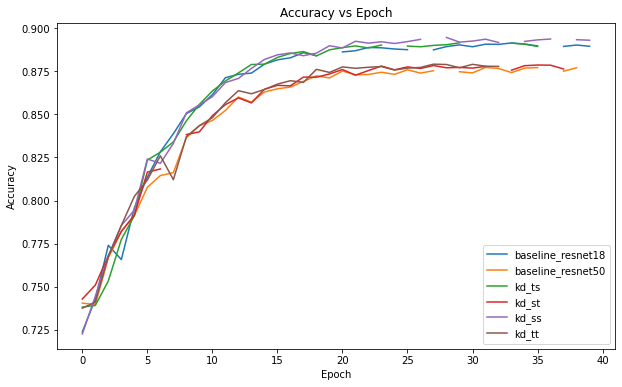

In [172]:
df_plot_val= get_multiple_accuracy_plot_df('flair', 'val','f1')
df_plot_val

plot_accuracy_dfs(df_plot_val)

/tmp/ipykernel_2480637/1071157253.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


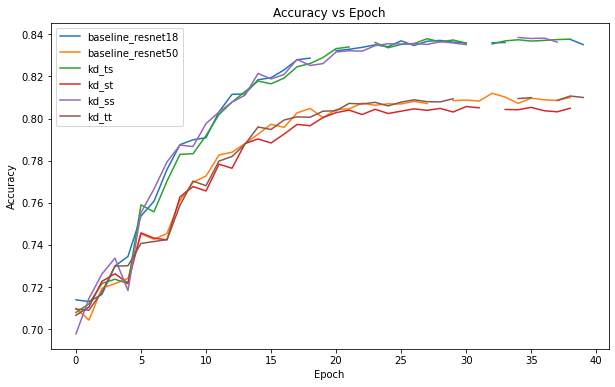

In [173]:
df_plot_t1ce_val= get_multiple_accuracy_plot_df('t1ce', 'val')

plot_accuracy_dfs(df_plot_t1ce_val)

/tmp/ipykernel_2480637/1071157253.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


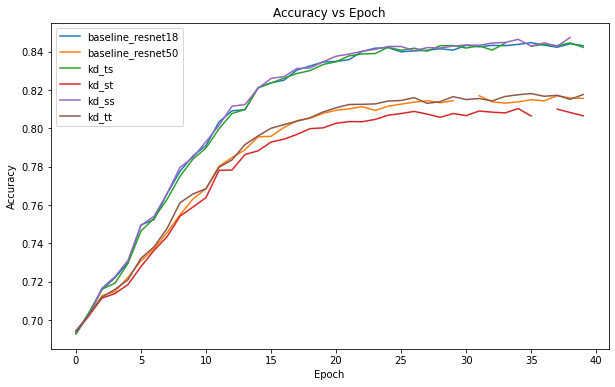

In [174]:
df_plot_t1ce_train= get_multiple_accuracy_plot_df('t1ce', 'train')

plot_accuracy_dfs(df_plot_t1ce_train)

/tmp/ipykernel_2480637/1071157253.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


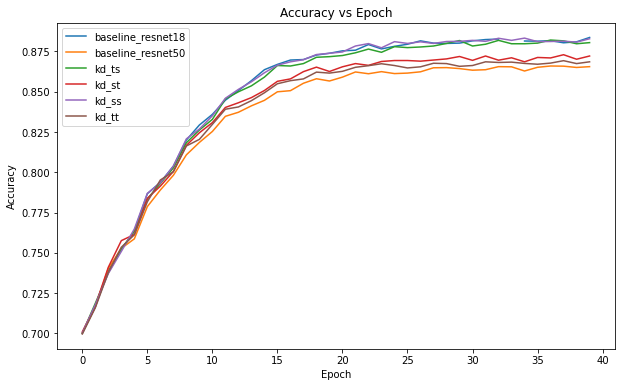

In [180]:
df_plot_flairt1ce_t2_train= get_multiple_accuracy_plot_df('flair_t1ce_t2', 'train')

plot_accuracy_dfs(df_plot_flairt1ce_t2_train)

/tmp/ipykernel_2480637/1071157253.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


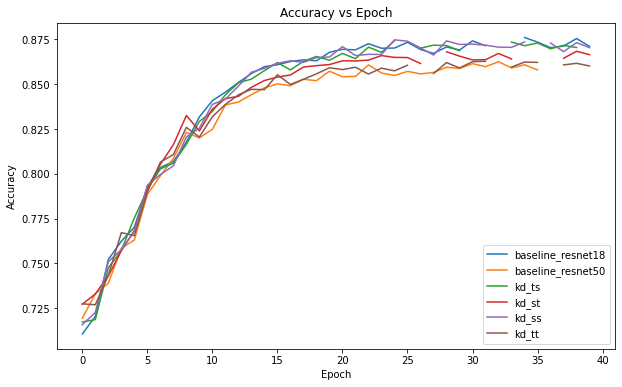

In [181]:
df_plot_flairt1ce_t2_val = get_multiple_accuracy_plot_df('flair_t1ce_t2', 'val')

plot_accuracy_dfs(df_plot_flairt1ce_t2_val)

# F1 score

In [193]:
def get_f1score_plotting_df(df_acc):    
    df = pd.DataFrame(df_acc.T)
    df.reset_index(level=0, inplace=True)
    # Rename the column
    df = df.rename(columns={'index': 'f1-score'})
    # Convert the 'accuracy' column to numeric type
    df['f1-score'] = pd.to_numeric(df['f1-score'], errors='coerce')
    # Round the 'accuracy' column to 4 decimal places
    df['f1-score'] = df['f1-score'].round(4)
    df = df.rename_axis('epoch')
    return df

def plot_f1score_dfs(dfs):
    # Create a list of legend labels for each dataframe
    legend_labels = ['baseline_resnet18', 'baseline_resnet50', 'kd_ts','kd_st','kd_ss','kd_tt']
    # Create a colormap for line colors
    colormap = plt.cm.get_cmap('tab10')
#     colormap = plt.cm.get_cmap('gist_heat')
    # Plot the data
    plt.figure(figsize=(10, 6))
    for i, df in enumerate(dfs):
        plt.plot(df.index, df['f1-score'], color=colormap(i), label=legend_labels[i])
    # Set plot title and labels
    plt.title('F1-score vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('f1-score')
    # Add legend
    plt.legend()
    # Show the plot
    plt.show()
    
    


def get_multiple_f1score_plot_df(mod, split):
    
    path ='/home/shsingh/knowledge_distillation/results'
    if split == 'train':
        list_name = 'list_train_f1'
    elif split == 'val':
        list_name = 'list_val_f1'
    
    train_acc_baseline18_df = pd.read_csv(f'{path}/{mod}/baseline/resnet18/{list_name}.csv')
    df_baseline18 = get_f1score_plotting_df(train_acc_baseline18_df)

    train_acc_baseline50_df = pd.read_csv(f'{path}/{mod}/baseline/resnet50/{list_name}.csv')
    df_baseline50 = get_f1score_plotting_df(train_acc_baseline50_df)

    train_acc_kd_ts_df = pd.read_csv(f'{path}/{mod}/kd/resnet50_resnet18/{list_name}.csv')
    df_kd_ts = get_f1score_plotting_df(train_acc_kd_ts_df)

    train_acc_kd_st_df = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet50/{list_name}.csv')
    df_kd_st = get_f1score_plotting_df(train_acc_kd_st_df)

    train_acc_kd_ss_df = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet18/{list_name}.csv')
    df_kd_ss = get_f1score_plotting_df(train_acc_kd_ss_df)

    train_acc_kd_tt_df = pd.read_csv(f'{path}/{mod}/kd_size/resnet50_resnet50/{list_name}.csv')
    df_kd_tt = get_f1score_plotting_df(train_acc_kd_tt_df)

    df_plot = [df_baseline18,df_baseline50, df_kd_ts,df_kd_st, df_kd_ss, df_kd_tt]

    return df_plot

/tmp/ipykernel_2480637/2447057013.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


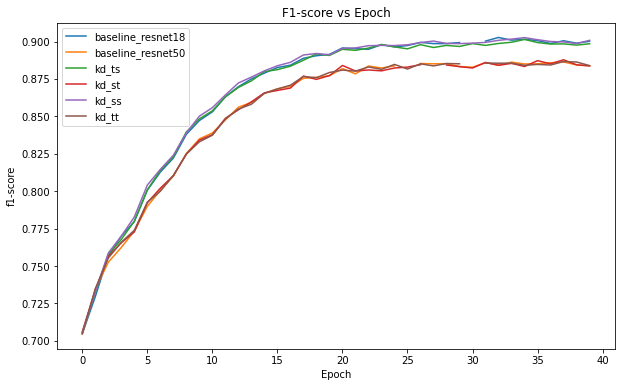

In [194]:
df_flair_train_plot = get_multiple_f1score_plot_df('flair', 'train')
plot_f1score_dfs(df_flair_train_plot)

In [2]:
def change_df_index_name(input_df):
    df = input_df.rename(index={0: 'precision', 1: 'recall', 2: 'f1score', 3: 'total_samples'})
    return df

In [3]:
path ='/home/shsingh/knowledge_distillation/results'
mod = 'flair_t1ce_t2'

# /home/shsingh/knowledge_distillation/results/flair_t1ce_t2/baseline/resnet18/classification_report_df.csv

df_flair_report_base18 = pd.read_csv(f'{path}/{mod}/baseline/resnet18/classification_report_df.csv')
df_flair_report_base18 = change_df_index_name(df_flair_report_base18)

df_flair_report_base50 = pd.read_csv(f'{path}/{mod}/baseline/resnet50/classification_report_df.csv')
df_flair_report_base50 = change_df_index_name(df_flair_report_base50)

df_flair_report_5018 = pd.read_csv(f'{path}/{mod}/kd/resnet50_resnet18/classification_report_df.csv')
df_flair_report_5018 = change_df_index_name(df_flair_report_5018)

df_flair_report_1850 = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet50/classification_report_df.csv')
df_flair_report_1850 = change_df_index_name(df_flair_report_1850)

df_flair_report_1818 = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet18/classification_report_df.csv')
df_flair_report_1818 = change_df_index_name(df_flair_report_1818)

df_flair_report_5050 = pd.read_csv(f'{path}/{mod}/kd_size/resnet50_resnet50/classification_report_df.csv')
df_flair_report_5050 = change_df_index_name(df_flair_report_5050)



In [12]:
df_flair_report_1818.T

,precision,recall,f1score,total_samples
healthy,0.840000,0.893617,0.865979,47.000000
HGG,0.900000,0.857143,0.878049,42.000000
LGG,0.666667,0.571429,0.615385,7.000000
accuracy,0.854167,0.854167,0.854167,0.854167
macro avg,0.802222,0.774063,0.786471,96.000000
weighted avg,0.853611,0.854167,0.852987,96.000000


In [14]:
df_flair_report_1818_new = df_flair_report_1818.T
df_flair_report_1818_new['df_name']= 'df_flair_report_1818'
df_flair_report_1818_new

,precision,recall,f1score,total_samples,df_name
healthy,0.840000,0.893617,0.865979,47.000000,df_flair_report_1818
HGG,0.900000,0.857143,0.878049,42.000000,df_flair_report_1818
LGG,0.666667,0.571429,0.615385,7.000000,df_flair_report_1818
accuracy,0.854167,0.854167,0.854167,0.854167,df_flair_report_1818
macro avg,0.802222,0.774063,0.786471,96.000000,df_flair_report_1818
weighted avg,0.853611,0.854167,0.852987,96.000000,df_flair_report_1818


In [4]:
df_flair_report_1818

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.840000,0.900000,0.666667,0.854167,0.802222,0.853611
recall,0.893617,0.857143,0.571429,0.854167,0.774063,0.854167
f1score,0.865979,0.878049,0.615385,0.854167,0.786471,0.852987
total_samples,47.000000,42.000000,7.000000,0.854167,96.000000,96.000000


In [15]:
df_flair_report_5050

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.857143,0.863636,1.000000,0.864583,0.906926,0.870400
recall,0.893617,0.904762,0.428571,0.864583,0.742317,0.864583
f1score,0.875000,0.883721,0.600000,0.864583,0.786240,0.858763
total_samples,47.000000,42.000000,7.000000,0.864583,96.000000,96.000000


In [6]:
df_flair_report_base18

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.807692,0.850000,1.000000,0.833333,0.885897,0.840224
recall,0.893617,0.809524,0.571429,0.833333,0.758190,0.833333
f1score,0.848485,0.829268,0.727273,0.833333,0.801675,0.831239
total_samples,47.000000,42.000000,7.000000,0.833333,96.000000,96.000000


In [7]:
df_flair_report_base50

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.784314,0.767442,0.500000,0.770833,0.683919,0.756201
recall,0.851064,0.785714,0.142857,0.770833,0.593212,0.770833
f1score,0.816327,0.776471,0.222222,0.770833,0.605006,0.755569
total_samples,47.000000,42.000000,7.000000,0.770833,96.000000,96.000000


In [8]:
df_flair_report_5018

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.820000,0.871795,0.571429,0.822917,0.754408,0.824535
recall,0.872340,0.809524,0.571429,0.822917,0.751098,0.822917
f1score,0.845361,0.839506,0.571429,0.822917,0.752099,0.822825
total_samples,47.000000,42.000000,7.000000,0.822917,96.000000,96.000000


In [9]:
df_flair_report_1850

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.860000,0.860465,0.666667,0.854167,0.795711,0.846106
recall,0.914894,0.880952,0.285714,0.854167,0.693853,0.854167
f1score,0.886598,0.870588,0.400000,0.854167,0.719062,0.844113
total_samples,47.000000,42.000000,7.000000,0.854167,96.000000,96.000000


/tmp/ipykernel_2517048/2735496254.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(df_names))


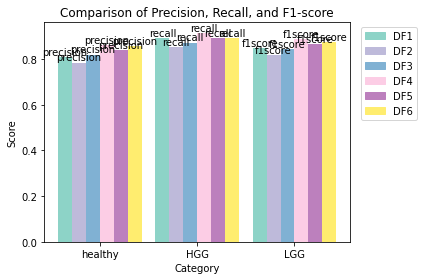

In [113]:


import matplotlib.patches as mpatches
# Concatenated DataFrame
concatenated_df = pd.concat([df_flair_report_base18,df_flair_report_base50, df_flair_report_5018, df_flair_report_1850, df_flair_report_1818, df_flair_report_5050], axis=1)


# Select the desired rows and columns for comparison
rows = ['precision', 'recall', 'f1score']
columns = ['healthy', 'HGG', 'LGG']

# Extract the values for plotting
values = concatenated_df.loc[rows, columns].values

# List of DataFrame names
df_names = ['DF1', 'DF2', 'DF3', 'DF4', 'DF5', 'DF6']

# Create a colormap
colormap = plt.cm.get_cmap('Set3', len(df_names))

# Plot the bar chart
fig, ax = plt.subplots()
width = 1.0 / (len(df_names) + 1)
ind = np.arange(len(columns))

patches = []  # List to store legend patches

for i, df_name in enumerate(df_names):
    bars = ax.bar(ind + i * width, values[:, i], width=width, color=colormap(i))
    patches.append(mpatches.Patch(color=colormap(i), label=df_name))
    # Add text labels for precision, recall, and f1score
    for j, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), rows[j], ha='center', va='bottom')

# Set x-axis labels and tick positions
ax.set_xticks(ind + width * (len(df_names) - 1) / 2)
ax.set_xticklabels(columns)

# Add legend outside the plot
ax.legend(handles=patches, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.title('Comparison of Precision, Recall, and F1-score')
plt.xlabel('Category')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


In [135]:
concatenated_df

,healthy,HGG,LGG,healthy,HGG,LGG,healthy,HGG,LGG,healthy,HGG,LGG,healthy,HGG,LGG,healthy,HGG,LGG
precision,0.807692,0.850000,1.000000,0.784314,0.767442,0.500000,0.820000,0.871795,0.571429,0.860000,0.860465,0.666667,0.840000,0.900000,0.666667,0.857143,0.863636,1.000000
recall,0.893617,0.809524,0.571429,0.851064,0.785714,0.142857,0.872340,0.809524,0.571429,0.914894,0.880952,0.285714,0.893617,0.857143,0.571429,0.893617,0.904762,0.428571
f1score,0.848485,0.829268,0.727273,0.816327,0.776471,0.222222,0.845361,0.839506,0.571429,0.886598,0.870588,0.400000,0.865979,0.878049,0.615385,0.875000,0.883721,0.600000
total_samples,47.000000,42.000000,7.000000,47.000000,42.000000,7.000000,47.000000,42.000000,7.000000,47.000000,42.000000,7.000000,47.000000,42.000000,7.000000,47.000000,42.000000,7.000000


In [19]:
df_flair_report_5050_new

,precision,recall,f1score,total_samples,df_name
healthy,0.857143,0.893617,0.875000,47.000000,df_flair_report_5050
HGG,0.863636,0.904762,0.883721,42.000000,df_flair_report_5050
LGG,1.000000,0.428571,0.600000,7.000000,df_flair_report_5050
accuracy,0.864583,0.864583,0.864583,0.864583,df_flair_report_5050
macro avg,0.906926,0.742317,0.786240,96.000000,df_flair_report_5050
weighted avg,0.870400,0.864583,0.858763,96.000000,df_flair_report_5050


In [17]:
df_flair_report_base18_new = df_flair_report_base18.T
df_flair_report_base18_new['df_name']= 'df_flair_report_base18'

df_flair_report_base50_new = df_flair_report_base50.T
df_flair_report_base50_new['df_name']= 'df_flair_report_base50'

df_flair_report_5018_new = df_flair_report_5018.T
df_flair_report_5018_new['df_name']= 'df_flair_report_5018'

df_flair_report_1850_new = df_flair_report_1850.T
df_flair_report_1850_new['df_name']= 'df_flair_report_1850'

df_flair_report_1818_new = df_flair_report_1818.T
df_flair_report_1818_new['df_name']= 'df_flair_report_1818'

df_flair_report_5050_new = df_flair_report_5050.T
df_flair_report_5050_new['df_name']= 'df_flair_report_5050'


/tmp/ipykernel_2527322/3519608940.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(df_names))


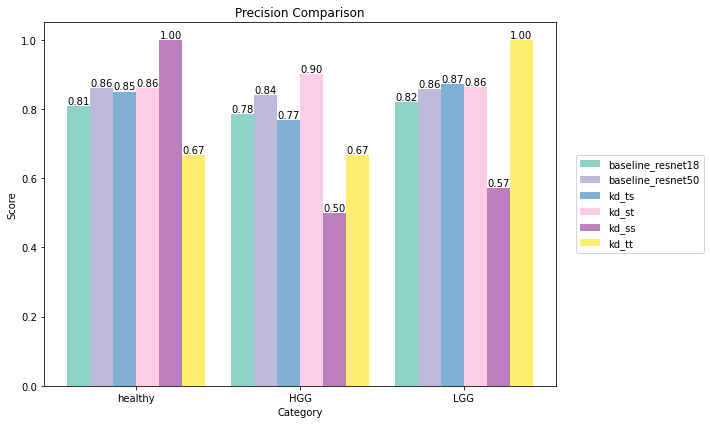

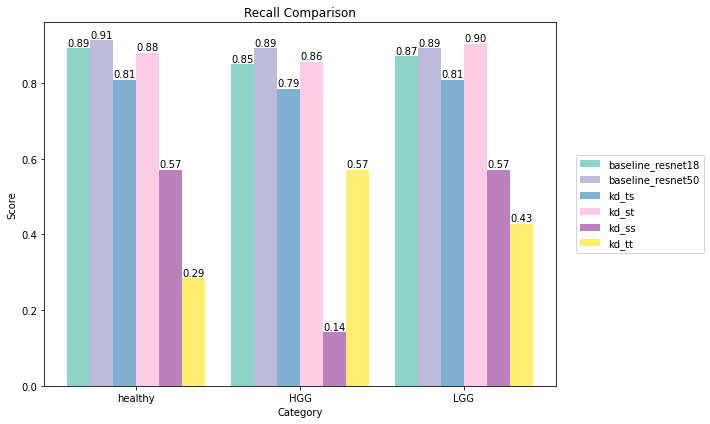

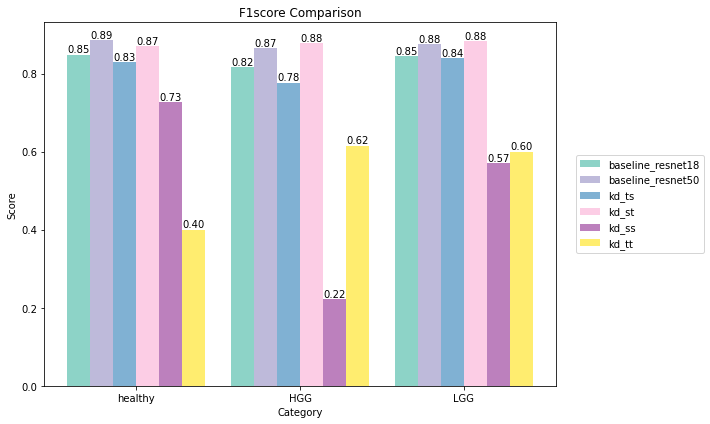

In [21]:

# Concatenated DataFrame
concatenated_df = pd.concat([df_flair_report_base18,df_flair_report_base50, 
                             df_flair_report_5018, df_flair_report_1850, df_flair_report_1818, 
                             df_flair_report_5050], axis=1)




# Select the desired rows and columns for comparison
rows = ['precision', 'recall', 'f1score']
columns = ['healthy', 'HGG', 'LGG']

# Extract the values for plotting and transpose the array
values = concatenated_df.loc[rows, columns].values

# List of DataFrame names
df_names =  ['baseline_resnet18', 'baseline_resnet50', 'kd_ts','kd_st','kd_ss','kd_tt']

# Create a colormap
colormap = plt.cm.get_cmap('Set3', len(df_names))

# Set the width of each bar
bar_width = 0.14

# Set the positions of the bars on the x-axis
r = np.arange(len(columns))

# Plot each metric separately
for i, metric in enumerate(rows):
    # Create a new figure and axis for each metric
    fig, ax = plt.subplots(figsize=(10, 6))

    for j, df_name in enumerate(df_names):
        # Calculate the x-coordinate for each group of bars
        x = r + (j - (len(df_names) - 1) / 2) * bar_width

        # Plot the bars
        ax.bar(x, values[i, j*len(columns):(j+1)*len(columns)], width=bar_width, label=df_name, color=colormap(j))

    # Set x-axis labels and tick positions
    ax.set_xticks(r)
    ax.set_xticklabels(columns)

    # Add labels for the metric values on each bar
    for j, df_name in enumerate(df_names):
        x = r + (j - (len(df_names) - 1) / 2) * bar_width
        for k, val in enumerate(values[i, j*len(columns):(j+1)*len(columns)]):
            ax.text(x[k], val, f'{val:.2f}', ha='center', va='bottom')

    # Move the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

    # Set plot title and labels
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_xlabel('Category')
    ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()


In [93]:
concatenated_df

,healthy,HGG,LGG,accuracy,macro avg,weighted avg,healthy,HGG,LGG,accuracy,...,LGG,accuracy,macro avg,weighted avg,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.807692,0.850000,1.000000,0.833333,0.885897,0.840224,0.784314,0.767442,0.500000,0.770833,...,0.666667,0.854167,0.802222,0.853611,0.857143,0.863636,1.000000,0.864583,0.906926,0.870400
recall,0.893617,0.809524,0.571429,0.833333,0.758190,0.833333,0.851064,0.785714,0.142857,0.770833,...,0.571429,0.854167,0.774063,0.854167,0.893617,0.904762,0.428571,0.864583,0.742317,0.864583
f1score,0.848485,0.829268,0.727273,0.833333,0.801675,0.831239,0.816327,0.776471,0.222222,0.770833,...,0.615385,0.854167,0.786471,0.852987,0.875000,0.883721,0.600000,0.864583,0.786240,0.858763
total_samples,47.000000,42.000000,7.000000,0.833333,96.000000,96.000000,47.000000,42.000000,7.000000,0.770833,...,7.000000,0.854167,96.000000,96.000000,47.000000,42.000000,7.000000,0.864583,96.000000,96.000000


In [26]:
path ='/home/shsingh/knowledge_distillation/results'
# mod = 'flair_t1ce_t2'
mod = 'flair'

# /home/shsingh/knowledge_distillation/results/flair_t1ce_t2/baseline/resnet18/classification_report_df.csv

df_mod_flair_report_base18 = pd.read_csv(f'{path}/{mod}/baseline/resnet18/classification_report_df.csv')
df_mod_flair_report_base18 = change_df_index_name(df_mod_flair_report_base18)

df_mod_flair_report_base50 = pd.read_csv(f'{path}/{mod}/baseline/resnet50/classification_report_df.csv')
df_mod_flair_report_base50 = change_df_index_name(df_mod_flair_report_base50)

df_mod_flair_report_5018 = pd.read_csv(f'{path}/{mod}/kd/resnet50_resnet18/classification_report_df.csv')
df_mod_flair_report_5018 = change_df_index_name(df_mod_flair_report_5018)

df_mod_flair_report_1850 = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet50/classification_report_df.csv')
df_mod_flair_report_1850 = change_df_index_name(df_mod_flair_report_1850)

df_mod_flair_report_1818 = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet18/classification_report_df.csv')
df_mod_flair_report_1818 = change_df_index_name(df_mod_flair_report_1818)

df_mod_flair_report_5050 = pd.read_csv(f'{path}/{mod}/kd_size/resnet50_resnet50/classification_report_df.csv')
df_mod_flair_report_5050 = change_df_index_name(df_mod_flair_report_5050)

# Concatenated DataFrame
concatenated_flair_df = pd.concat([df_mod_flair_report_base18,df_mod_flair_report_base50, 
                             df_mod_flair_report_5018, df_mod_flair_report_1850, df_mod_flair_report_1818, 
                             df_mod_flair_report_5050], axis=1)

# get_score_multiple_model_mod_barplot(concatenated_df)

In [25]:
concatenated_flair_df

,healthy,HGG,LGG,accuracy,macro avg,weighted avg,healthy,HGG,LGG,accuracy,...,LGG,accuracy,macro avg,weighted avg,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.921569,0.948718,0.833333,0.927083,0.901207,0.926730,0.956522,0.928571,0.875000,0.9375,...,0.857143,0.947917,0.924001,0.948933,0.978261,0.928571,0.875000,0.947917,0.927277,0.949510
recall,0.979167,0.902439,0.714286,0.927083,0.865297,0.927083,0.916667,0.951220,1.000000,0.9375,...,0.857143,0.947917,0.919861,0.947917,0.937500,0.951220,1.000000,0.947917,0.962907,0.947917
f1score,0.949495,0.925000,0.769231,0.927083,0.881242,0.925889,0.936170,0.939759,0.933333,0.9375,...,0.857143,0.947917,0.921183,0.947401,0.957447,0.939759,0.933333,0.947917,0.943513,0.948134
total_samples,48.000000,41.000000,7.000000,0.927083,96.000000,96.000000,48.000000,41.000000,7.000000,0.9375,...,7.000000,0.947917,96.000000,96.000000,48.000000,41.000000,7.000000,0.947917,96.000000,96.000000


/tmp/ipykernel_2527322/1665948351.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(df_names))


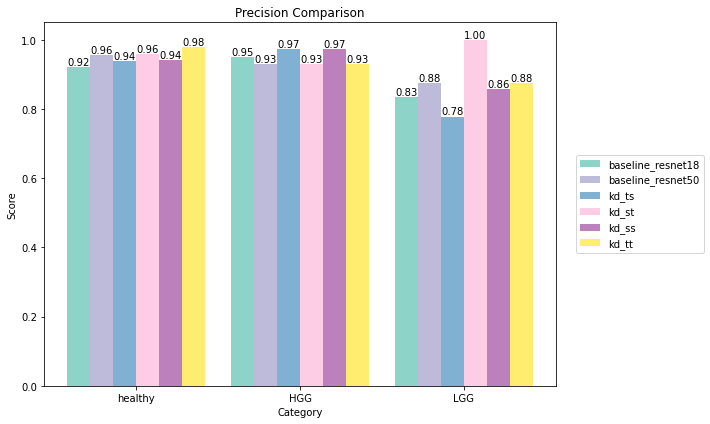

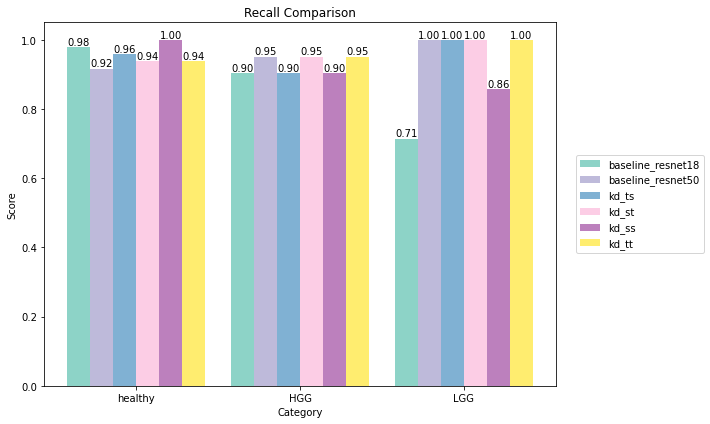

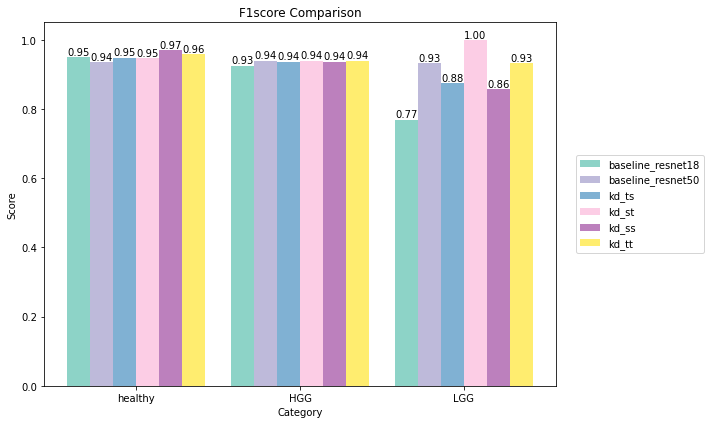

In [27]:
# Concatenated DataFrame
concatenated_flair_df = pd.concat([df_mod_flair_report_base18,df_mod_flair_report_base50, 
                             df_mod_flair_report_5018, df_mod_flair_report_1850, df_mod_flair_report_1818, 
                             df_mod_flair_report_5050], axis=1)

# Select the desired rows and columns for comparison
rows = ['precision', 'recall', 'f1score']
columns = ['healthy', 'HGG', 'LGG']

# Extract the values for plotting and transpose the array
values = concatenated_flair_df.loc[rows, columns].values

# List of DataFrame names
df_names = ['baseline_resnet18', 'baseline_resnet50', 'kd_ts', 'kd_st', 'kd_ss', 'kd_tt']

# Create a colormap
colormap = plt.cm.get_cmap('Set3', len(df_names))

# Set the width of each bar
bar_width = 0.14

# Set the positions of the bars on the x-axis
r = np.arange(len(columns))

# Plot each metric separately
for i, metric in enumerate(rows):
    # Create a new figure and axis for each metric
    fig, ax = plt.subplots(figsize=(10, 6))

    for j, df_name in enumerate(df_names):
        # Calculate the x-coordinate for each group of bars
        x = r + (j - (len(df_names) - 1) / 2) * bar_width

        # Plot the bars
        ax.bar(x, values[i, j::len(df_names)], width=bar_width, label=df_name, color=colormap(j))

    # Set x-axis labels and tick positions
    ax.set_xticks(r)
    ax.set_xticklabels(columns)

    # Add labels for the metric values on each bar
    for j, df_name in enumerate(df_names):
        x = r + (j - (len(df_names) - 1) / 2) * bar_width
        for k, val in enumerate(values[i, j::len(df_names)]):
            ax.text(x[k], val, f'{val:.2f}', ha='center', va='bottom')

    # Move the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

    # Set plot title and labels
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_xlabel('Category')
    ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()


In [ ]:
df_mod_flair_report_base18,df_mod_flair_report_base50, 
                             df_mod_flair_report_5018, df_mod_flair_report_1850, df_mod_flair_report_1818, 
                             df_mod_flair_report_5050]

In [83]:
df_mod_flair_report_base18

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.921569,0.948718,0.833333,0.927083,0.901207,0.926730
recall,0.979167,0.902439,0.714286,0.927083,0.865297,0.927083
f1score,0.949495,0.925000,0.769231,0.927083,0.881242,0.925889
total_samples,48.000000,41.000000,7.000000,0.927083,96.000000,96.000000


In [58]:
df_flair_report_base18

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.807692,0.850000,1.000000,0.833333,0.885897,0.840224
recall,0.893617,0.809524,0.571429,0.833333,0.758190,0.833333
f1score,0.848485,0.829268,0.727273,0.833333,0.801675,0.831239
total_samples,47.000000,42.000000,7.000000,0.833333,96.000000,96.000000


In [55]:
concatenated_df

,healthy,HGG,LGG,accuracy,macro avg,weighted avg,healthy,HGG,LGG,accuracy,...,LGG,accuracy,macro avg,weighted avg,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.807692,0.850000,1.000000,0.833333,0.885897,0.840224,0.784314,0.767442,0.500000,0.770833,...,0.666667,0.854167,0.802222,0.853611,0.857143,0.863636,1.000000,0.864583,0.906926,0.870400
recall,0.893617,0.809524,0.571429,0.833333,0.758190,0.833333,0.851064,0.785714,0.142857,0.770833,...,0.571429,0.854167,0.774063,0.854167,0.893617,0.904762,0.428571,0.864583,0.742317,0.864583
f1score,0.848485,0.829268,0.727273,0.833333,0.801675,0.831239,0.816327,0.776471,0.222222,0.770833,...,0.615385,0.854167,0.786471,0.852987,0.875000,0.883721,0.600000,0.864583,0.786240,0.858763
total_samples,47.000000,42.000000,7.000000,0.833333,96.000000,96.000000,47.000000,42.000000,7.000000,0.770833,...,7.000000,0.854167,96.000000,96.000000,47.000000,42.000000,7.000000,0.864583,96.000000,96.000000


In [59]:
# particular columns
result = concatenated_df.loc[["precision", "recall",'f1score'],
            ['healthy',"HGG",'LGG']]

result

,healthy,healthy,healthy,healthy,healthy,healthy,HGG,HGG,HGG,HGG,HGG,HGG,LGG,LGG,LGG,LGG,LGG,LGG
precision,0.807692,0.784314,0.820000,0.860000,0.840000,0.857143,0.850000,0.767442,0.871795,0.860465,0.900000,0.863636,1.000000,0.500000,0.571429,0.666667,0.666667,1.000000
recall,0.893617,0.851064,0.872340,0.914894,0.893617,0.893617,0.809524,0.785714,0.809524,0.880952,0.857143,0.904762,0.571429,0.142857,0.571429,0.285714,0.571429,0.428571
f1score,0.848485,0.816327,0.845361,0.886598,0.865979,0.875000,0.829268,0.776471,0.839506,0.870588,0.878049,0.883721,0.727273,0.222222,0.571429,0.400000,0.615385,0.600000


/tmp/ipykernel_2527322/2873036282.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(df_names))


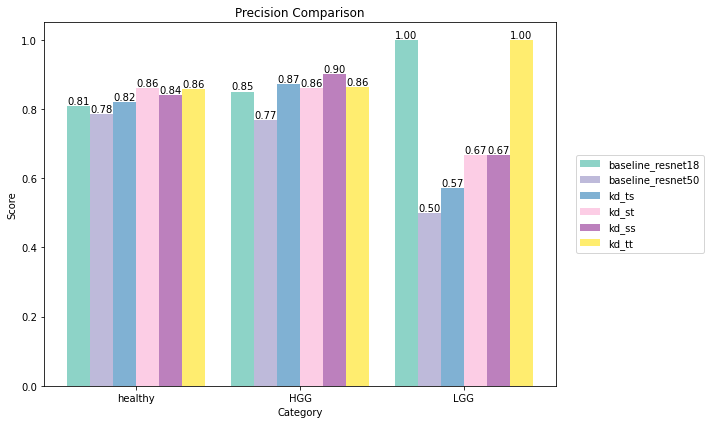

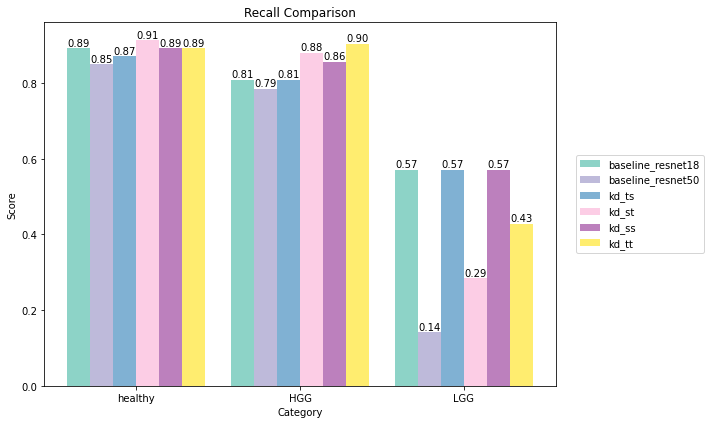

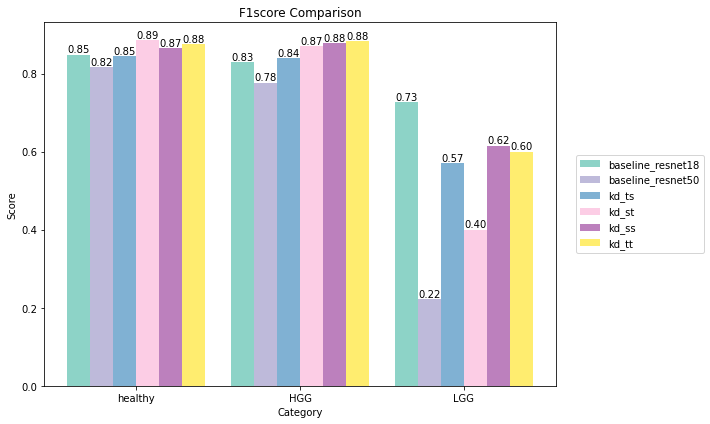

In [23]:
# Concatenated DataFrame
concatenated_df = pd.concat([df_flair_report_base18, df_flair_report_base50,
                             df_flair_report_5018, df_flair_report_1850, df_flair_report_1818,
                             df_flair_report_5050], axis=1)

# Select the desired rows and columns for comparison
rows = ['precision', 'recall', 'f1score']
columns = ['healthy', 'HGG', 'LGG']

# Extract the values for plotting and transpose the array
values = concatenated_df.loc[rows, columns].values

# List of DataFrame names
df_names = ['baseline_resnet18', 'baseline_resnet50', 'kd_ts', 'kd_st', 'kd_ss', 'kd_tt']

# Create a colormap
colormap = plt.cm.get_cmap('Set3', len(df_names))

# Set the width of each bar
bar_width = 0.14

# Set the positions of the bars on the x-axis
r = np.arange(len(columns))

# Plot each metric separately
for i, metric in enumerate(rows):
    # Create a new figure and axis for each metric
    fig, ax = plt.subplots(figsize=(10, 6))

    for j, df_name in enumerate(df_names):
        # Calculate the x-coordinate for each group of bars
        x = r + (j - (len(df_names) - 1) / 2) * bar_width

        # Plot the bars
        ax.bar(x, values[i, j::len(df_names)], width=bar_width, label=df_name, color=colormap(j))

    # Set x-axis labels and tick positions
    ax.set_xticks(r)
    ax.set_xticklabels(columns)

    # Add labels for the metric values on each bar
    for j, df_name in enumerate(df_names):
        x = r + (j - (len(df_names) - 1) / 2) * bar_width
        for k, val in enumerate(values[i, j::len(df_names)]):
            ax.text(x[k], val, f'{val:.2f}', ha='center', va='bottom')

    # Move the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

    # Set plot title and labels
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_xlabel('Category')
    ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()


# T1CE

In [28]:
path ='/home/shsingh/knowledge_distillation/results'
# mod = 'flair_t1ce_t2'
mod = 't1ce'

# /home/shsingh/knowledge_distillation/results/flair_t1ce_t2/baseline/resnet18/classification_report_df.csv

df_mod_t1ce_report_base18 = pd.read_csv(f'{path}/{mod}/baseline/resnet18/classification_report_df.csv')
df_mod_t1ce_report_base18 = change_df_index_name(df_mod_t1ce_report_base18)

df_mod_t1ce_report_base50 = pd.read_csv(f'{path}/{mod}/baseline/resnet50/classification_report_df.csv')
df_mod_t1ce_report_base50 = change_df_index_name(df_mod_t1ce_report_base50)

df_mod_t1ce_report_5018 = pd.read_csv(f'{path}/{mod}/kd/resnet50_resnet18/classification_report_df.csv')
df_mod_t1ce_report_5018 = change_df_index_name(df_mod_t1ce_report_5018)

df_mod_t1ce_report_1850 = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet50/classification_report_df.csv')
df_mod_t1ce_report_1850 = change_df_index_name(df_mod_t1ce_report_1850)

df_mod_t1ce_report_1818 = pd.read_csv(f'{path}/{mod}/kd_size/resnet18_resnet18/classification_report_df.csv')
df_mod_t1ce_report_1818 = change_df_index_name(df_mod_t1ce_report_1818)

df_mod_t1ce_report_5050 = pd.read_csv(f'{path}/{mod}/kd_size/resnet50_resnet50/classification_report_df.csv')
df_mod_t1ce_report_5050 = change_df_index_name(df_mod_t1ce_report_5050)

# Concatenated DataFrame
concatenated_t1ce_df = pd.concat([df_mod_t1ce_report_base18,df_mod_t1ce_report_base50, 
                             df_mod_t1ce_report_5018, df_mod_t1ce_report_1850, df_mod_t1ce_report_1818, 
                             df_mod_t1ce_report_5050], axis=1)

# get_score_multiple_model_mod_barplot(concatenated_df)

/tmp/ipykernel_2527322/1062657856.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(df_names))


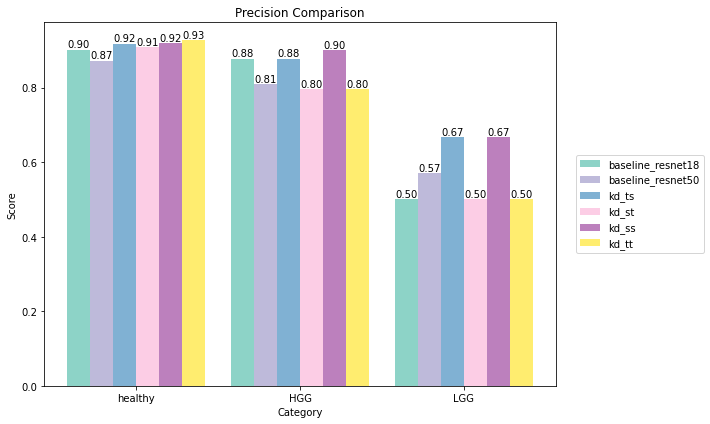

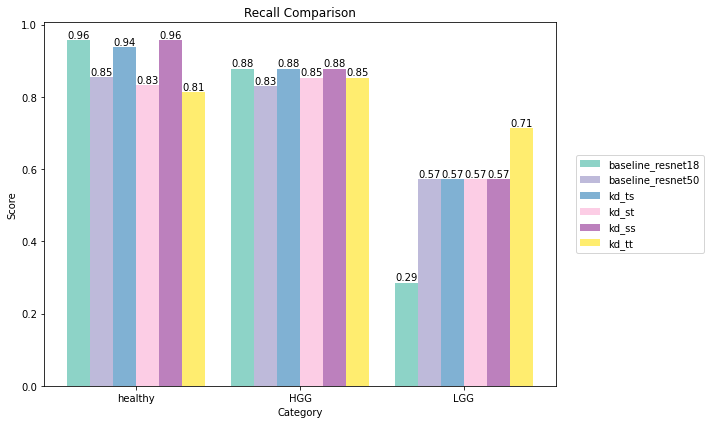

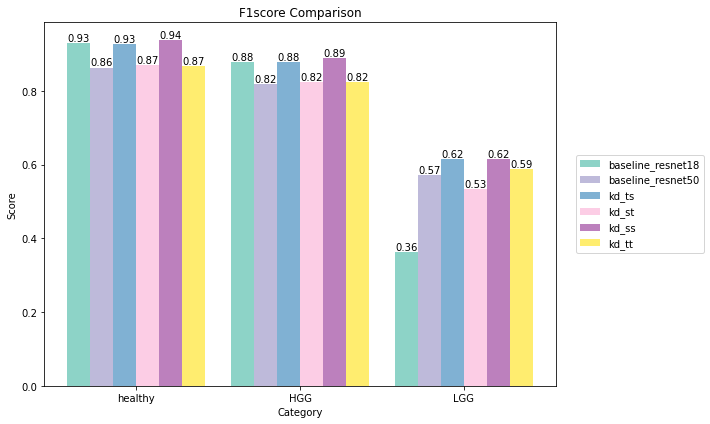

In [29]:
# Concatenated DataFrame
concatenated_t1ce_df = pd.concat([df_mod_t1ce_report_base18,df_mod_t1ce_report_base50, 
                             df_mod_t1ce_report_5018, df_mod_t1ce_report_1850, df_mod_t1ce_report_1818, 
                             df_mod_t1ce_report_5050], axis=1)

# Select the desired rows and columns for comparison
rows = ['precision', 'recall', 'f1score']
columns = ['healthy', 'HGG', 'LGG']

# Extract the values for plotting and transpose the array
values = concatenated_t1ce_df.loc[rows, columns].values

# List of DataFrame names
df_names = ['baseline_resnet18', 'baseline_resnet50', 'kd_ts', 'kd_st', 'kd_ss', 'kd_tt']

# Create a colormap
colormap = plt.cm.get_cmap('Set3', len(df_names))

# Set the width of each bar
bar_width = 0.14

# Set the positions of the bars on the x-axis
r = np.arange(len(columns))

# Plot each metric separately
for i, metric in enumerate(rows):
    # Create a new figure and axis for each metric
    fig, ax = plt.subplots(figsize=(10, 6))

    for j, df_name in enumerate(df_names):
        # Calculate the x-coordinate for each group of bars
        x = r + (j - (len(df_names) - 1) / 2) * bar_width

        # Plot the bars
        ax.bar(x, values[i, j::len(df_names)], width=bar_width, label=df_name, color=colormap(j))

    # Set x-axis labels and tick positions
    ax.set_xticks(r)
    ax.set_xticklabels(columns)

    # Add labels for the metric values on each bar
    for j, df_name in enumerate(df_names):
        x = r + (j - (len(df_names) - 1) / 2) * bar_width
        for k, val in enumerate(values[i, j::len(df_names)]):
            ax.text(x[k], val, f'{val:.2f}', ha='center', va='bottom')

    # Move the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

    # Set plot title and labels
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_xlabel('Category')
    ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()


# Confusion MATRIX

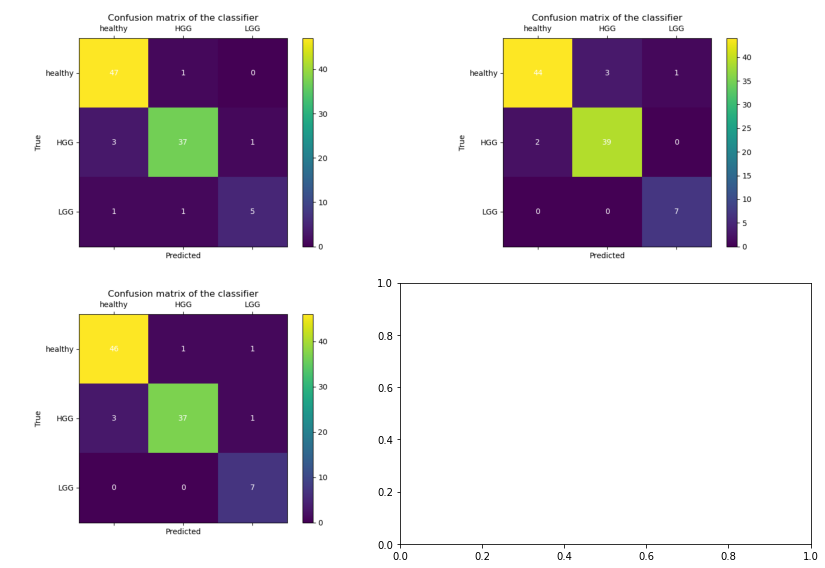

In [30]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the paths to the confusion matrix images
image_paths = ['/home/shsingh/knowledge_distillation/results/flair/baseline/resnet18/confusion_matrix.png',
               '/home/shsingh/knowledge_distillation/results/flair/baseline/resnet50/confusion_matrix.png', 
               '/home/shsingh/knowledge_distillation/results/flair/kd/resnet50_resnet18/confusion_matrix.png']

# Set the number of rows and columns in the grid
num_rows = 2
num_cols = 2

# Create a new figure and axis with the desired size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array if it's multidimensional
if num_rows > 1 and num_cols > 1:
    axes = axes.flatten()

# Iterate over the image paths and plot each image in the grid
for i, image_path in enumerate(image_paths):
    # Load the image using PIL
    image = Image.open(image_path)

    # Plot the image on the corresponding axis
    axes[i].imshow(image)
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [33]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torchvision.models import resnet18, resnet50
# from paths import OUTPUT_DIR
from pathlib import Path

OUTPUT_DIR = Path('/home/shsingh/knowledge_distillation/results')


def boolCheck(input):
    if input == "True":
        return True 
    elif input == "False":
        return None

def get_resnet18_model(num_classes, device_index, to_use_pre_trained_weights) :
    device = torch.device(device_index) if torch.cuda.is_available() else torch.device('cpu')
    np.random.seed(31101995)
    torch.manual_seed(31101995)
    to_use_weight = boolCheck(to_use_pre_trained_weights)
    model =  resnet18(weights=to_use_weight)
    # model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
    n_inputs = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(n_inputs, 64),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.4),
        nn.Linear(64, num_classes),
    )
    return model

def get_resnet50_model(num_classes, device_index, to_use_pre_trained_weights):
    device = torch.device(device_index) if torch.cuda.is_available() else torch.device('cpu')
    np.random.seed(31101995)
    torch.manual_seed(31101995)
    to_use_weight = boolCheck(to_use_pre_trained_weights)
    model = resnet50(weights=to_use_weight)
    # model = resnet50(weights=to_use_pre_trained_weights)
    # model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
    n_inputs = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(n_inputs, 64),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.4),
        nn.Linear(64, num_classes),
    )
    return model

def get_teacher_student_model(num_classes, device_index, mod, to_use_pre_trained_weights):
    device = torch.device(device_index) if torch.cuda.is_available() else torch.device('cpu')
    #get pre-trained teacher model
    #initialize teacher model 
    teacher = get_resnet50_model(num_classes, device_index, to_use_pre_trained_weights)
    # teacher_model_path = OUTPUT_DIR / mod / 'baseline/resnet50_base_no_weights/resnet50_base.pt'
    teacher_model_path = OUTPUT_DIR / mod / 'baseline/resnet50/resnet50_base.pt'
    teacher.load_state_dict(torch.load(teacher_model_path))
    #initialize student model
    student = get_resnet18_model(num_classes, device_index, to_use_pre_trained_weights)
    return  teacher, student

def get_student_teacher_model(num_classes, device_index, mod, to_use_pre_trained_weights):
    device = torch.device(device_index) if torch.cuda.is_available() else torch.device('cpu')
    #get pre-trained student  model
    teacher = get_resnet18_model(num_classes, device_index, to_use_pre_trained_weights)
    teacher_model_path = OUTPUT_DIR / mod / 'baseline/resnet18/resnet18_base.pt'
    teacher.load_state_dict(torch.load(teacher_model_path))
    #Initialize teacher(ResNet50 models)
    student = get_resnet50_model(num_classes, device_index, to_use_pre_trained_weights)
    return  teacher, student

def get_teacher_teacher_model(num_classes, device_index, mod,  to_use_pre_trained_weights):
    device = torch.device(device_index) if torch.cuda.is_available() else torch.device('cpu')
    #get pre-trained teacher model
    #initialize teacher model 
    pre_trained_teacher = get_resnet50_model(num_classes, device_index, to_use_pre_trained_weights)
    # teacher_model_path = OUTPUT_DIR / mod / 'baseline/resnet50_base_no_weights/resnet50_base.pt'
    pre_trained_teacher_model_path = OUTPUT_DIR / mod / 'baseline/resnet50/resnet50_base.pt'
    pre_trained_teacher.load_state_dict(torch.load(pre_trained_teacher_model_path))
    #Initialize teacher(ResNet50 model)
    teacher = get_resnet50_model(num_classes, device_index, to_use_pre_trained_weights)
    return pre_trained_teacher, teacher

def get_student_student_model(num_classes, device_index, mod,  to_use_pre_trained_weights):
    device = torch.device(device_index) if torch.cuda.is_available() else torch.device('cpu')
    #get pre-trained student  model
    pre_trained_student = get_resnet18_model(num_classes, device_index, to_use_pre_trained_weights)
    pre_trained_student_model_path = OUTPUT_DIR / mod / 'baseline/resnet18/resnet18_base.pt'
    pre_trained_student.load_state_dict(torch.load(pre_trained_student_model_path))
    #initialize student model
    student = get_resnet18_model(num_classes, device_index, to_use_pre_trained_weights)
    return pre_trained_student, student

def get_bidirectional_teacher_student_model(num_classes, device_index, mod,  to_use_pre_trained_weights):
    return 

def get_model_by_name(model_name,num_classes,  mod,device_index, to_use_pre_trained_weights ):
    if model_name is not None:
        if model_name == 'resnet18':
            model = get_resnet18_model(num_classes, device_index, to_use_pre_trained_weights)
        elif model_name == 'resnet50':
            model = get_resnet50_model(num_classes, device_index, to_use_pre_trained_weights) 
        elif model_name == 'teacher_student':
            model = get_teacher_student_model(num_classes, device_index, mod, to_use_pre_trained_weights)
        elif model_name == 'student_teacher':
            model =  get_student_teacher_model(num_classes, device_index, mod,  to_use_pre_trained_weights)        
        elif model_name == 'teacher_teacher':
            model =  get_teacher_teacher_model(num_classes, device_index, mod,  to_use_pre_trained_weights)
        elif model_name == 'student_student':
            model =  get_student_student_model(num_classes, device_index, mod,  to_use_pre_trained_weights)
        elif model_name == 'bidirectional_kd':
            model = get_bidirectional_teacher_student_model(num_classes, device_index, mod,  to_use_pre_trained_weights)
        else:
            print("requires a model name")
    else:
        raise ValueError('Please select a model name')
    return model

In [35]:
model_name = 'teacher_student'
num_classes =3
mod = 'flair'
device_index =7
to_use_pre_trained_weights = 'True'

teacher, student = get_model_by_name(model_name,num_classes, mod,device_index, to_use_pre_trained_weights )

/home/shsingh/anaconda3/envs/thesis/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/shsingh/anaconda3/envs/thesis/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# compare classifiers

In [2]:
import glob
file_path ="/home/shsingh/knowledge_distillation/results/flair/baseline/"
files = glob.glob(file_path + '/**/classification_report_df.csv')
report_list=[]
report_model=[]
for file in files:
    print(file)
    model = file.split('/')[-2]
    print(model)
    report_model.append(model)
    report_list.append(file)

/home/shsingh/knowledge_distillation/results/flair/baseline/resnet50/classification_report_df.csv
resnet50
/home/shsingh/knowledge_distillation/results/flair/baseline/swin_t/classification_report_df.csv
swin_t
/home/shsingh/knowledge_distillation/results/flair/baseline/resnet18/classification_report_df.csv
resnet18
/home/shsingh/knowledge_distillation/results/flair/baseline/densenet121/classification_report_df.csv
densenet121
/home/shsingh/knowledge_distillation/results/flair/baseline/convnext_tiny/classification_report_df.csv
convnext_tiny
/home/shsingh/knowledge_distillation/results/flair/baseline/efficientnet_v2_s/classification_report_df.csv
efficientnet_v2_s
/home/shsingh/knowledge_distillation/results/flair/baseline/vit_b_16/classification_report_df.csv
vit_b_16


In [4]:
import pandas as pd
report= pd.read_csv(report_list[0])
report = change_df_index_name(report)
report

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.956522,0.928571,0.875000,0.9375,0.920031,0.938640
recall,0.916667,0.951220,1.000000,0.9375,0.955962,0.937500
f1score,0.936170,0.939759,0.933333,0.9375,0.936421,0.937496
total_samples,48.000000,41.000000,7.000000,0.9375,96.000000,96.000000


In [3]:
def change_df_index_name(input_df):
    df = input_df.rename(index={0: 'precision', 1: 'recall', 2: 'f1score', 3: 'total_samples'})
    return df

In [6]:
dfs=[]
for i in report_list:
    df = pd.read_csv(i)
    df_reindex = change_df_index_name(report)
#     df_concat= pd.concat([df_reindex])
    dfs.append(df_reindex)
dfs
result_df = pd.concat(dfs, ignore_index=False)
result_df

,healthy,HGG,LGG,accuracy,macro avg,weighted avg
precision,0.956522,0.928571,0.875000,0.9375,0.920031,0.938640
recall,0.916667,0.951220,1.000000,0.9375,0.955962,0.937500
f1score,0.936170,0.939759,0.933333,0.9375,0.936421,0.937496
total_samples,48.000000,41.000000,7.000000,0.9375,96.000000,96.000000
precision,0.956522,0.928571,0.875000,0.9375,0.920031,0.938640
recall,0.916667,0.951220,1.000000,0.9375,0.955962,0.937500
f1score,0.936170,0.939759,0.933333,0.9375,0.936421,0.937496
total_samples,48.000000,41.000000,7.000000,0.9375,96.000000,96.000000
precision,0.956522,0.928571,0.875000,0.9375,0.920031,0.938640
recall,0.916667,0.951220,1.000000,0.9375,0.955962,0.937500


In [19]:
report_model

['resnet50',
 'swin_t',
 'resnet18',
 'densenet121',
 'convnext_tiny',
 'efficientnet_v2_s',
 'vit_b_16']

In [21]:
path ='/home/shsingh/knowledge_distillation/results'
# mod = 'flair_t1ce_t2'
mod = 'flair'

# /home/shsingh/knowledge_distillation/results/flair_t1ce_t2/baseline/resnet18/classification_report_df.csv

df_mod_resnet18 = pd.read_csv(f'{path}/{mod}/baseline/resnet18/classification_report_df.csv')
df_mod_resnet18 = change_df_index_name(df_mod_resnet18)

df_mod_resnet50 = pd.read_csv(f'{path}/{mod}/baseline/resnet50/classification_report_df.csv')
df_mod_resnet50 = change_df_index_name(df_mod_resnet50)

df_mod_densenet121 = pd.read_csv(f'{path}/{mod}/baseline/densenet121/classification_report_df.csv')
df_mod_densenet121 = change_df_index_name(df_mod_densenet121)

df_mod_convnext_tiny = pd.read_csv(f'{path}/{mod}/baseline/convnext_tiny/classification_report_df.csv')
df_mod_convnext_tiny = change_df_index_name(df_mod_convnext_tiny)

df_mod_efficientnet_v2_s = pd.read_csv(f'{path}/{mod}/baseline/efficientnet_v2_s/classification_report_df.csv')
df_mod_efficientnet_v2_s = change_df_index_name(df_mod_efficientnet_v2_s)

df_mod_vit_b_16 = pd.read_csv(f'{path}/{mod}/baseline/vit_b_16/classification_report_df.csv')
df_mod_vit_b_16 = change_df_index_name(df_mod_vit_b_16)

df_mod_swin_t = pd.read_csv(f'{path}/{mod}/baseline/swin_t/classification_report_df.csv')
df_mod_swin_t = change_df_index_name(df_mod_swin_t)

# Concatenated DataFrame
concatenated_df = pd.concat([df_mod_resnet18,df_mod_resnet50, 
                             df_mod_densenet121, df_mod_convnext_tiny, df_mod_efficientnet_v2_s, 
                             df_mod_vit_b_16, df_mod_swin_t], axis=1)

# get_score_multiple_model_mod_barplot(concatenated_df)

/tmp/ipykernel_53639/2234056102.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(df_names))


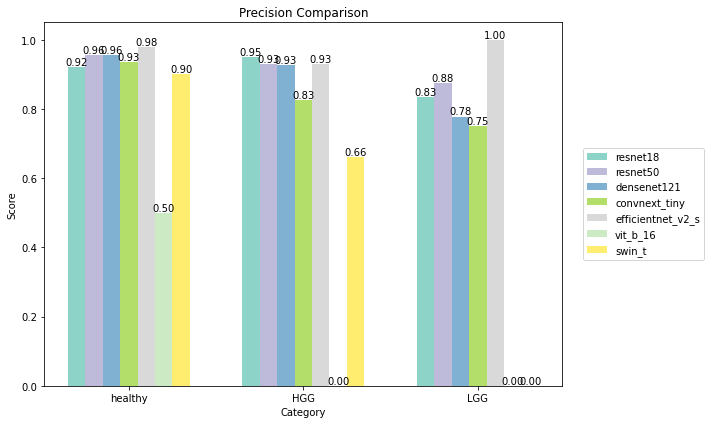

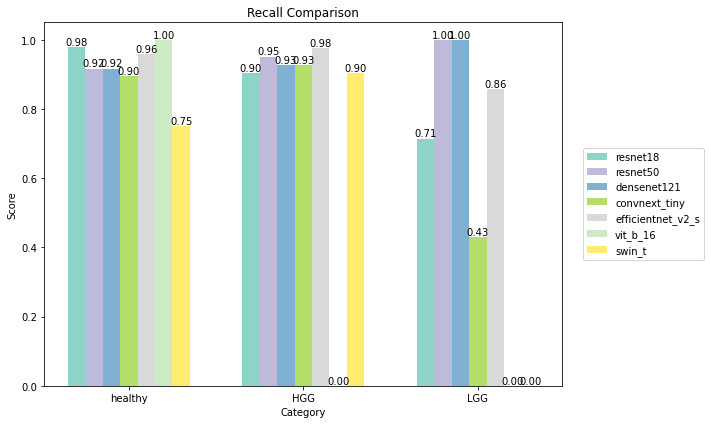

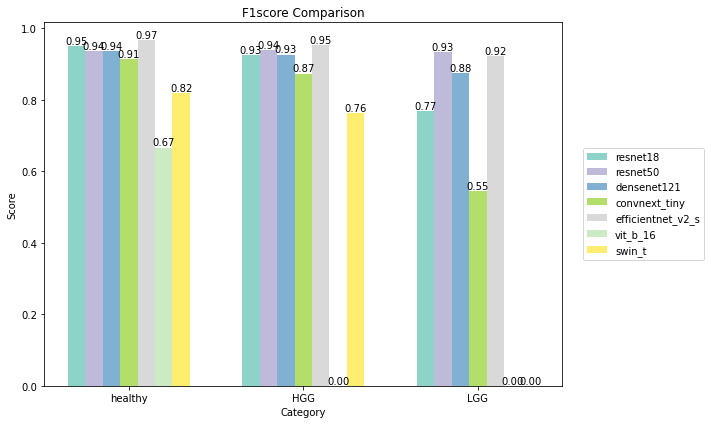

In [25]:
# Concatenated DataFrame
concatenated_t1ce_df = pd.concat([df_mod_resnet18,df_mod_resnet50, 
                             df_mod_densenet121, df_mod_convnext_tiny, df_mod_efficientnet_v2_s, 
                             df_mod_vit_b_16, df_mod_swin_t], axis=1)
# Select the desired rows and columns for comparison
rows = ['precision', 'recall', 'f1score']
columns = ['healthy', 'HGG', 'LGG']

# Extract the values for plotting and transpose the array
values = concatenated_t1ce_df.loc[rows, columns].values

# List of DataFrame names
df_names = ['resnet18', 'resnet50', 'densenet121', 'convnext_tiny', 'efficientnet_v2_s', 'vit_b_16','swin_t']

# Create a colormap
colormap = plt.cm.get_cmap('Set3', len(df_names))

# Set the width of each bar
bar_width = 0.10

# Set the positions of the bars on the x-axis
r = np.arange(len(columns))

# Plot each metric separately
for i, metric in enumerate(rows):
    # Create a new figure and axis for each metric
    fig, ax = plt.subplots(figsize=(10, 6))

    for j, df_name in enumerate(df_names):
        # Calculate the x-coordinate for each group of bars
        x = r + (j - (len(df_names) - 1) / 2) * bar_width

        # Plot the bars
        ax.bar(x, values[i, j::len(df_names)], width=bar_width, label=df_name, color=colormap(j))

    # Set x-axis labels and tick positions
    ax.set_xticks(r)
    ax.set_xticklabels(columns)

    # Add labels for the metric values on each bar
    for j, df_name in enumerate(df_names):
        x = r + (j - (len(df_names) - 1) / 2) * bar_width
        for k, val in enumerate(values[i, j::len(df_names)]):
            ax.text(x[k], val, f'{val:.2f}', ha='center', va='bottom')

    # Move the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

    # Set plot title and labels
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_xlabel('Category')
    ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_53639/2507037220.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(df_names))


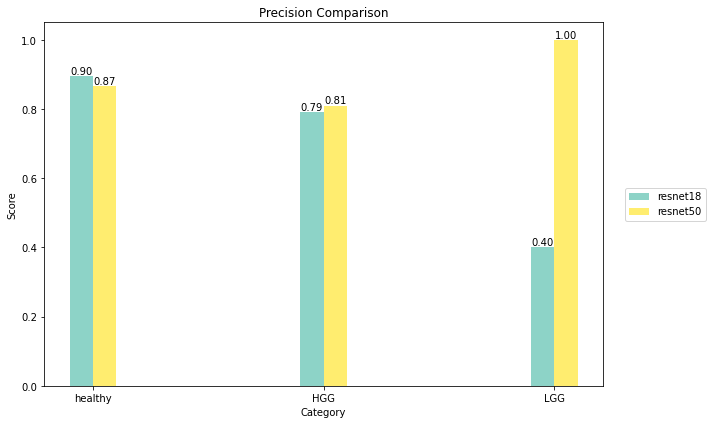

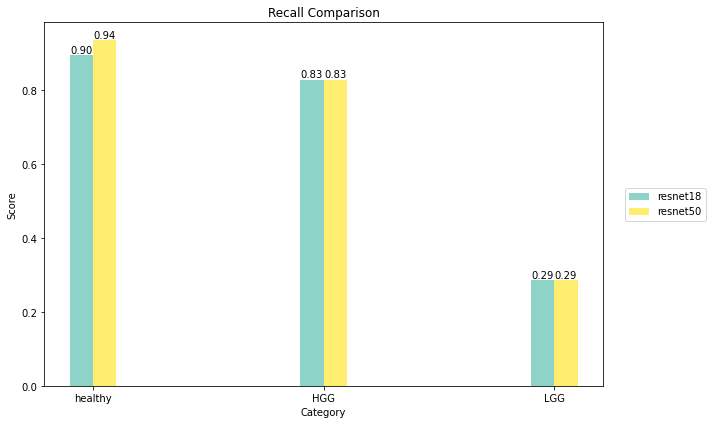

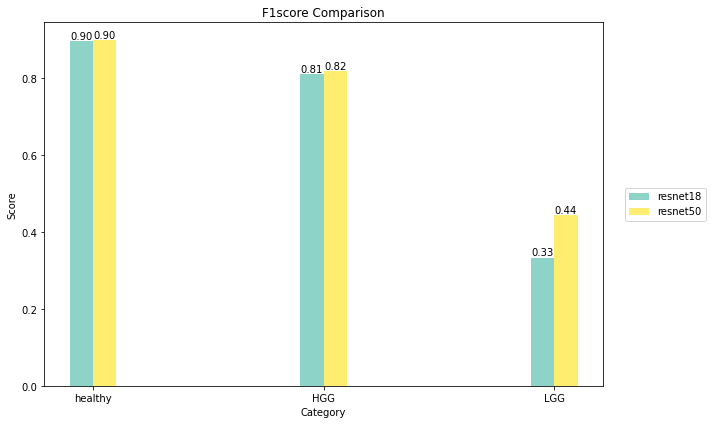

In [27]:
path ='/home/shsingh/knowledge_distillation/results'
# mod = 'flair_t1ce_t2'
mod = 't2'

# /home/shsingh/knowledge_distillation/results/flair_t1ce_t2/baseline/resnet18/classification_report_df.csv

df_mod_resnet18t2 = pd.read_csv(f'{path}/{mod}/baseline/resnet18/classification_report_df.csv')
df_mod_resnet18t2 = change_df_index_name(df_mod_resnet18t2)

df_mod_resnet50t2 = pd.read_csv(f'{path}/{mod}/baseline/resnet50/classification_report_df.csv')
df_mod_resnet50t2 = change_df_index_name(df_mod_resnet50t2)

# Concatenated DataFrame
concatenated_t2_df = pd.concat([df_mod_resnet18t2,df_mod_resnet50t2], axis=1)
# Select the desired rows and columns for comparison
rows = ['precision', 'recall', 'f1score']
columns = ['healthy', 'HGG', 'LGG']

# Extract the values for plotting and transpose the array
values = concatenated_t2_df.loc[rows, columns].values

# List of DataFrame names
df_names = ['resnet18', 'resnet50']

# Create a colormap
colormap = plt.cm.get_cmap('Set3', len(df_names))

# Set the width of each bar
bar_width = 0.10

# Set the positions of the bars on the x-axis
r = np.arange(len(columns))

# Plot each metric separately
for i, metric in enumerate(rows):
    # Create a new figure and axis for each metric
    fig, ax = plt.subplots(figsize=(10, 6))

    for j, df_name in enumerate(df_names):
        # Calculate the x-coordinate for each group of bars
        x = r + (j - (len(df_names) - 1) / 2) * bar_width

        # Plot the bars
        ax.bar(x, values[i, j::len(df_names)], width=bar_width, label=df_name, color=colormap(j))

    # Set x-axis labels and tick positions
    ax.set_xticks(r)
    ax.set_xticklabels(columns)

    # Add labels for the metric values on each bar
    for j, df_name in enumerate(df_names):
        x = r + (j - (len(df_names) - 1) / 2) * bar_width
        for k, val in enumerate(values[i, j::len(df_names)]):
            ax.text(x[k], val, f'{val:.2f}', ha='center', va='bottom')

    # Move the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

    # Set plot title and labels
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_xlabel('Category')
    ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()

# plot CLASS DISTRIBUTION (train and test)

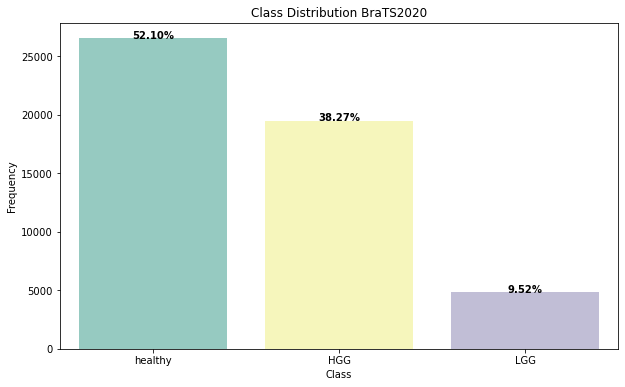

In [78]:
from pathlib import Path
import pandas as pd

csv_save_path = Path('/home/shsingh/knowledge_distillation/dataset/scratch/dataframes/train_test_splits/')
class_column_name = 'label_flair'

def get_train_test_df(csv_save_path, class_column_name):
    df_train = pd.read_csv(csv_save_path / 'train_df.csv', index_col =0)
    df_train = df_train[df_train[class_column_name]!='discard'].reset_index(drop=True)
    df_test = pd.read_csv(csv_save_path / 'test_df.csv', index_col =0)
    df_test  = df_test[df_test[class_column_name]!='discard'].reset_index(drop=True)
    return df_train, df_test



def plot_dataset_distribution(csv_save_path, class_column_name):
    
    train_data, test_data = get_train_test_df(csv_save_path, class_column_name)
    # Concatenate the data for plotting
    combined_data = pd.concat([train_data, test_data])
    # Set the color palette
    palette = sns.color_palette('Set3', n_colors=len(combined_data['label_flair'].unique()))
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x='label_flair', data=combined_data, palette=palette)
    # Add legend
    # plt.legend(labels=['Train', 'Test'])
    # Add normalized values on top of each bar
    total = len(combined_data)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height/total:.2%}', ha='center', fontsize=10, fontweight='bold')
    # Set plot labels and title
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution BraTS2020')
    # Show the plot
    plt.show()
    return

plot_dataset_distribution(csv_save_path, class_column_name)

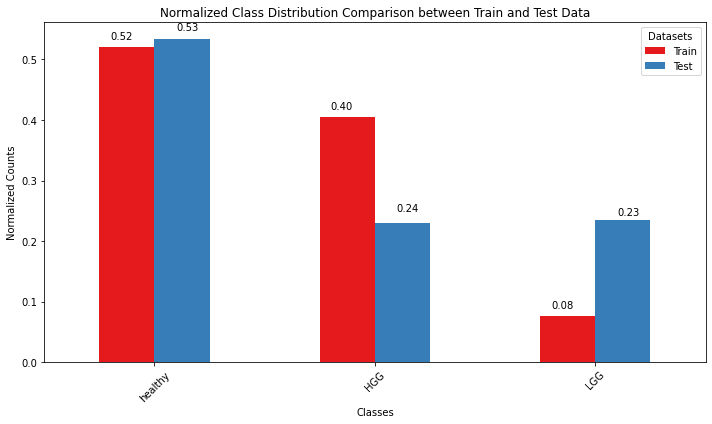

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded train_df and test_df
train_df = df_train
test_df = df_test
# Group the data by 'label_flair' and count the occurrences in both dataframes
train_class_counts = train_df['label_flair'].value_counts(normalize=True)
test_class_counts = test_df['label_flair'].value_counts(normalize=True)

# Concatenate the counts into a single dataframe
class_counts = pd.concat([train_class_counts, test_class_counts], axis=1, keys=['Train', 'Test'])

# Define a color palette
palette = sns.color_palette("Set1", len(class_counts))

# Plot the data
ax = class_counts.plot(kind='bar', figsize=(10, 6), color=palette)

# Adding data labels (normalized values) on top of the bars
for i, (train_count, test_count) in enumerate(zip(train_class_counts, test_class_counts)):
    plt.text(i - 0.15, train_count + 0.01, f'{train_count:.2f}', ha='center', va='bottom', fontsize=10, fontweight='light', color='black')
    plt.text(i + 0.15, test_count + 0.01, f'{test_count:.2f}', ha='center', va='bottom', fontsize=10, fontweight='light', color='black')

plt.title('Normalized Class Distribution Comparison between Train and Test Data')
plt.xlabel('Classes')
plt.ylabel('Normalized Counts')
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Datasets')

# Show the plot
plt.tight_layout()
plt.show()


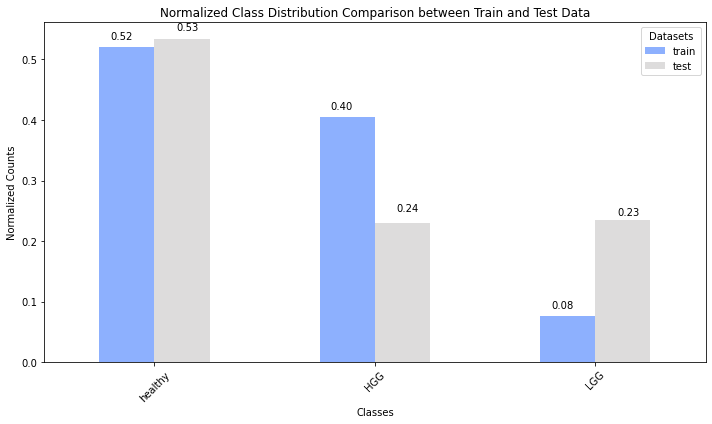

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_train_test_class_distribution(csv_save_path, class_column_name):
    
    train_data, test_data = get_train_test_df(csv_save_path, class_column_name)

    # Group the data by 'label_flair' and count the occurrences in both dataframes
    train_class_counts = train_data[class_column_name].value_counts(normalize=True)
    test_class_counts = test_data[class_column_name].value_counts(normalize=True)
    # Concatenate the counts into a single dataframe
    class_counts = pd.concat([train_class_counts, test_class_counts], axis=1, keys=['train', 'test'])
    # Define a color palette (using 'Set3')deep, plasma_r, cubehelix_r, autumn_r, icefire,Accent_r
    #Purples, coolwarm
    palette = sns.color_palette("coolwarm", len(class_counts))
    # Plot the data
    ax = class_counts.plot(kind='bar', figsize=(10, 6), color=palette)

    # Adding data labels (normalized values) on top of the bars
    for i, (train_count, test_count) in enumerate(zip(train_class_counts, test_class_counts)):
        plt.text(i - 0.15, train_count + 0.01, f'{train_count:.2f}', ha='center', va='bottom', fontsize=10, fontweight='light', color='black')
        plt.text(i + 0.15, test_count + 0.01, f'{test_count:.2f}', ha='center', va='bottom', fontsize=10, fontweight='light', color='black')

    plt.title('Normalized Class Distribution Comparison between Train and Test Data')
    plt.xlabel('Classes')
    plt.ylabel('Normalized Counts')
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend(title='Datasets')

    # Show the plot
    plt.tight_layout()
    plt.show()
    return


plot_train_test_class_distribution(csv_save_path, class_column_name)

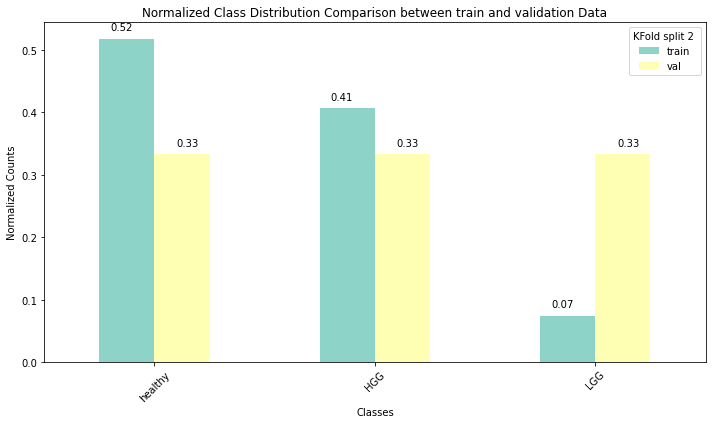

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_train_val_class_distribution(csv_save_path, class_column_name, fold):
    
    train_data = pd.read_csv(csv_save_path / f'fold_{fold}' / f'train_df_fold_{fold}.csv')
    val_data = pd.read_csv(csv_save_path / f'fold_{fold}' / f'val_df_fold_{fold}.csv')

    # Group the data by 'label_flair' and count the occurrences in both dataframes
    train_class_counts = train_data[class_column_name].value_counts(normalize=True)
    val_class_counts = val_data[class_column_name].value_counts(normalize=True)
    # Concatenate the counts into a single dataframe
    class_counts = pd.concat([train_class_counts, val_class_counts], axis=1, keys=['train', 'val'])
    # Define a color palette (using 'Set3')deep, plasma_r, cubehelix_r, autumn_r, icefire,Accent_r
    #Purples, coolwarm
    palette = sns.color_palette("Set3", len(class_counts))
    # Plot the data
    ax = class_counts.plot(kind='bar', figsize=(10, 6), color=palette)

    # Adding data labels (normalized values) on top of the bars
    for i, (train_count, val_count) in enumerate(zip(train_class_counts, val_class_counts)):
        plt.text(i - 0.15, train_count + 0.01, f'{train_count:.2f}', ha='center', va='bottom', fontsize=10, fontweight='light', color='black')
        plt.text(i + 0.15, val_count + 0.01, f'{val_count:.2f}', ha='center', va='bottom', fontsize=10, fontweight='light', color='black')

    plt.title('Normalized Class Distribution Comparison between train and validation Data')
    plt.xlabel('Classes')
    plt.ylabel('Normalized Counts')
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend(title=f'KFold split {fold} ')

    # Show the plot
    plt.tight_layout()
    plt.show()
    return


plot_train_val_class_distribution(csv_save_path, class_column_name, 2)

In [22]:
df_train = pd.read_csv("/home/shsingh/knowledge_distillation/dataset/scratch/dataframes/train_df.csv")
df_val = pd.read_csv("/home/shsingh/knowledge_distillation/dataset/scratch/dataframes/val_df.csv")
df_test = pd.read_csv("/home/shsingh/knowledge_distillation/dataset/scratch/dataframes/test_df.csv")

In [23]:
print(len(df_train))
print(len(df_val))
len(df_test)

35832
8959


6108

In [25]:
# Create a new DataFrame with the value counts and ratios of each unique value in the selected columns
value_counts_train = df_train[columns].apply(lambda x: x.value_counts(normalize=True)).T
# Create a new DataFrame with the value counts and ratios of each unique value in the selected columns
value_counts_val = df_val[columns].apply(lambda x: x.value_counts(normalize=True)).T
# Create a new DataFrame with the value counts and ratios of each unique value in the selected columns
value_counts_test = df_test[columns].apply(lambda x: x.value_counts(normalize=True)).T

KeyError: "None of [Index(['healthy', 'HGG', 'LGG'], dtype='object')] are in the [columns]"

In [44]:
value_counts_train, value_counts_val, value_counts_test

(              healthy       HGG      LGG
 label_flair  0.521791  0.382299  0.09591,
               healthy       HGG       LGG
 label_flair  0.520501  0.386102  0.093397,
               healthy       HGG       LGG
 label_flair  0.521889  0.383833  0.094278)

In [52]:
# value_counts_train_df= pd.DataFrame(value_counts_train)
value_counts_train_df =  pd.concat([value_counts_train, value_counts_val, value_counts_test ])
value_counts_train_df

,healthy,HGG,LGG
label_flair,0.521791,0.382299,0.095910
label_flair,0.520501,0.386102,0.093397
label_flair,0.521889,0.383833,0.094278


In [57]:
# df_concat = pd.concat([df_train,df_val, df_test])
# df_concat

/tmp/ipykernel_53639/2231632105.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3', len(df_names))


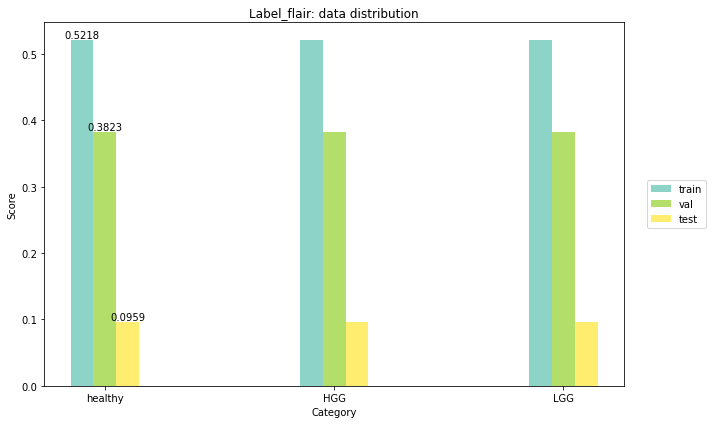

In [64]:
rows = ['label_flair']
columns = ['healthy', 'HGG', 'LGG']

# Extract the values for plotting and transpose the array
values = value_counts_train_df.loc[rows, columns].values

# List of DataFrame names
df_names = ['train', 'val','test']

# Create a colormap
# colormap = plt.cm.get_cmap('BuPu_r', len(df_names))
colormap = plt.cm.get_cmap('Set3', len(df_names))

# Set the width of each bar
bar_width = 0.10

# Set the positions of the bars on the x-axis
r = np.arange(len(columns))

# Plot each metric separately
for i, metric in enumerate(rows):
    # Create a new figure and axis for each metric
    fig, ax = plt.subplots(figsize=(10, 6))
    for j, df_name in enumerate(df_names):
        # Calculate the x-coordinate for each group of bars
        x = r + (j - (len(df_names) - 1) / 2) * bar_width
        # Plot the bars
        ax.bar(x, values[i, j::len(df_names)], width=bar_width, label=df_name, color=colormap(j))
    # Set x-axis labels and tick positions
    ax.set_xticks(r)
    ax.set_xticklabels(columns)

    # Add labels for the metric values on each bar
    for j, df_name in enumerate(df_names):
        x = r + (j - (len(df_names) - 1) / 2) * bar_width
        for k, val in enumerate(values[i, j::len(df_names)]):
            ax.text(x[k], val, f'{val:.4f}', ha='center', va='bottom')

    # Move the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

    # Set plot title and labels
    ax.set_title(f'{metric.capitalize()}: data distribution')
    ax.set_xlabel('Category')
    ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()